In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Helper functions 

In [2]:
def evaluation(y_true, y_pred, title = ""):
    """
    This function is used to compute the confusion matrix 
    and other evaluation metrics.
    """
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix for {}: \n'.format(title), cm)
    total = sum(sum(cm))
    
    print('=============')
    accuracy = (cm[0,0] + cm[1,1]) /total
    print ('Accuracy    : {}'.format(accuracy))
    Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    print('Specificity :  {}'.format(Specificity))
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    print('Sensitivity :  {}'.format(sensitivity))
    
    
def plot_swarm(x, y, df):
    sns.set()
    sns.swarmplot(x=x, y = y, data = df)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

### EDA 
- 51 paying users are not recorded in spending_df
- iaps_df["user_id"].nunique() - pd.merge(iaps_df,spending_df, on = "user_id")["user_id"].nunique()

In [3]:
### load data 
user_df = pd.read_csv("users.csv")
sessions_df = pd.read_csv("sessions.csv").drop_duplicates()
iaps_df = pd.read_csv("iaps.csv").drop_duplicates()
spending_df = pd.read_csv("spendevents.csv").drop_duplicates()


### change to datetime format
spending_df["date"] = pd.to_datetime(spending_df["date"])
sessions_df["date"] = pd.to_datetime(sessions_df["date"])
user_df["install_date"] = pd.to_datetime(user_df["install_date"])
iaps_df["date"] = pd.to_datetime(iaps_df["date"])

## Non- paying users characteristics 

In [4]:
non_payer_df = user_df[~user_df.user_id.isin(iaps_df["user_id"].unique())] ## total of 21050 non-paying users
session_non_payer_df = pd.merge(non_payer_df, sessions_df, on = "user_id")
session_non_payer_df["days_from_installed"] = session_non_payer_df["date"] - session_non_payer_df["install_date"]
session_non_payer_df["days_from_installed"] = session_non_payer_df["days_from_installed"].dt.days
label0_df = session_non_payer_df[session_non_payer_df.days_from_installed > 45][["user_id", "install_date"]].drop_duplicates()
label0_ls = session_non_payer_df[session_non_payer_df.days_from_installed > 45]["user_id"].unique() ### 1926 label 0 to train
label0_ls

array([   10,    11,    15, ..., 22556, 22560, 22562], dtype=int64)

In [5]:
label0_df.head(2)

,user_id,install_date
285,10,2019-03-05
331,11,2019-03-04


In [6]:
label0_df.shape

(2463, 2)

###  1. Current level
- In the label 0 group of 2463 non-paying users, 186 of them don't have record in spendevents. We will exclude them 
- label0_df["user_id"].nunique() - label0_chapter["user_id"].nunique()

In [9]:
label0_chapter = pd.merge(label0_df, spending_df, on = 'user_id')
idx = label0_chapter.groupby("user_id")["chapter"].transform(max) == label0_chapter["chapter"]
df_chapter = label0_chapter[idx][["user_id", "chapter"]].drop_duplicates()
df_chapter.head(2)

,user_id,chapter
3,10,3
6,11,9


In [15]:
df_chapter.shape ### 2463 - 186 (excluding 186 missing users data)

(2277, 2)

Text(0.5, 1.0, 'ECDF plot of current chapters of non-convertible users')

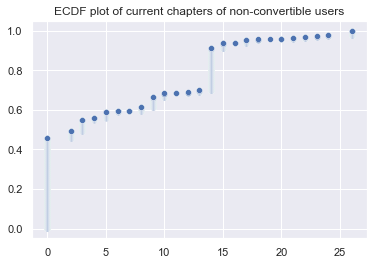

In [10]:
sns.set()
x_ecdf, y_ecdf = ecdf(df_chapter["chapter"])
sns.scatterplot(x=x_ecdf, y=y_ecdf)
plt.title("ECDF plot of current chapters of non-convertible users")

In [ ]:
### 2. Current amount of gems 